# サポートベクトルマシン

サポートベクトルマシン全般については次を確認してください。
[https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)

**データとモジュールのロード**

In [1]:
import pandas as pd
from sklearn import model_selection

data = pd.read_csv("input/pn_same_judge_preprocessed.csv")
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay

## SVC

[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
を使います。

In [3]:
from sklearn.svm import LinearSVC

In [4]:
pipe = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=str.split)),
    ("clf", LinearSVC())
])

pipe.fit(train["tokens"], train["label_num"])

Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<method 'split' of 'str' objects>)),
                ('clf', LinearSVC())])

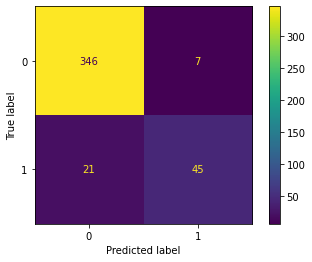

In [5]:
pred = pipe.predict(test["tokens"])
ConfusionMatrixDisplay.from_predictions(y_true=test["label_num"], y_pred=pred)

In [6]:
# SVC では predict_proba ではなく decision_function を使います
score = pipe.decision_function(test["tokens"])

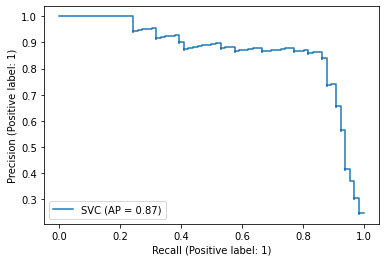

In [7]:
PrecisionRecallDisplay.from_predictions(
    y_true=test["label_num"],
    y_pred=score,
    name="SVC",
)

## 不均衡データに対応する

`class_weight` パラメータで不均衡データに対応できます。

In [8]:
pipe_weight = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=str.split)),
    ("clf", LinearSVC(class_weight="balanced"))
])

pipe_weight.fit(train["tokens"], train["label_num"])

Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<method 'split' of 'str' objects>)),
                ('clf', LinearSVC(class_weight='balanced'))])

In [9]:
score_weight = pipe_weight.decision_function(test["tokens"])

class_weightオプションを付けないモデルと比較します。

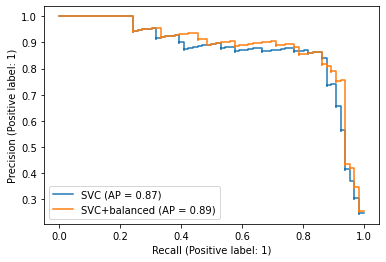

In [10]:
import  matplotlib.pyplot as plt

_, ax = plt.subplots()
for name, pred in [
    ("SVC", score),
    ("SVC+balanced", score_weight),
]:
    PrecisionRecallDisplay.from_predictions(ax=ax, y_true=test["label_num"], y_pred=pred, name=name)